<h1 style="text-align: center;">Breast Cancer Classification</h1>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
columns = ["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean",
           "compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean",
           "radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se",
           "concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst",
           "area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst",
           "fractal_dimension_worst",]

df = pd.read_csv('Dataset/wdbc.csv', header=None, names=columns, engine='python')
df.reset_index(inplace=True)
df = df.drop(columns=['index'])
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [4]:
# checking the dimensions of the dataset
print(f"Total number of data points: {df.shape[0]}")
print(f"Total number of features: {df.shape[1]}")

Total number of data points: 569
Total number of features: 32


In [5]:
# checking the statistical measures of the features in the dataset
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [6]:
# checking for null values
null_vals = df.isnull().values.any()
if null_vals == True:
    print("There are missing values in the dataset!")
else:
    print("There are no null values in the dataset!")

df.isnull().sum()

There are no null values in the dataset!


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Since the diagnosis column has only M (Malignant) and B (Benign), this can be replaced with 1 for M and 0 for B.

In [7]:
print("Malignant being replaced with: 1")
print("Benign being replaced with: 0")

# replacing malignant and benign with 1 and 0
df['diagnosis'] = df['diagnosis'].map(lambda row: 1 if row =='M' else 0)
df

Malignant being replaced with: 1
Benign being replaced with: 0


id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.14710  ...        25.380          17.33           184.60   
1                0.07017  ...        24.990          23.41           158.80   
2                0.12790  ...        23.570          25.53           152.50   
3                0.10520  ...        14.910          26.50            98.87   
4                0.10430  ...        22.540          16.67           152.20   
..                   ...  ...           ...            ...              ...   
564              0.13890  ...        25.450          26.40           166.10   
565              0.09791  ...        23.690          38.25           155.00   
566              0.05302  ...        18.980          34.12           126.70   
567              0.15200  ...        25.740          39.42           184.60   
568              0.00000  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0

In [8]:
# checking for unique values in the columns
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

We have to check for the balance between the Malignant and Benign classes in the dataframe.

In [9]:
print(f"Total number of data points: {len(df)}")
malignant_percentage = round(df['diagnosis'].mean(),3) * 100
benign_percentage = (1 - round(df['diagnosis'].mean(),3)) * 100

print(f"Percentage of Malignant diagnosis: {malignant_percentage}%")
print(f"Percentage of Benign diagnosis: {benign_percentage}%")

Total number of data points: 569
Percentage of Malignant diagnosis: 37.3%
Percentage of Benign diagnosis: 62.7%


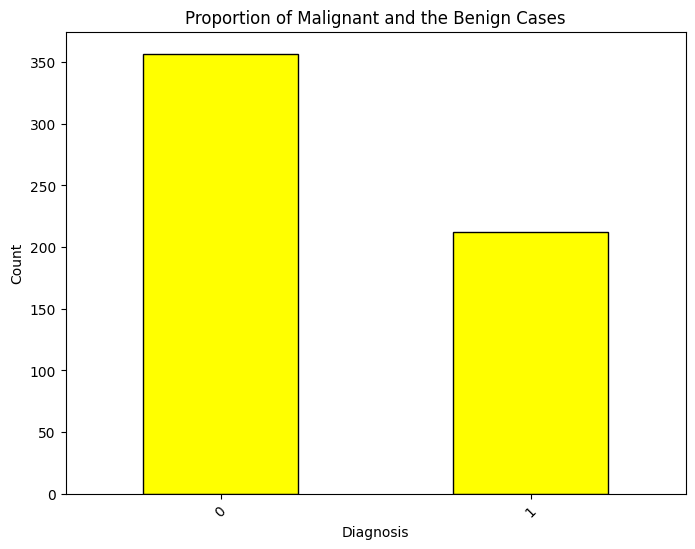

In [10]:
plt.figure(figsize=(8,6))
df['diagnosis'].value_counts().plot(kind='bar', color='yellow', edgecolor='black')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title("Proportion of Malignant and the Benign Cases")
plt.xticks(rotation=45)
plt.show()

This shows us that there is a clear imbalance between the two classes in the dataset. This gives rise to the phenomenon of Benign diagnosis being a majority class and Malignant diagnosis being a minority class.

Next we could draw the correlation matrix to see how the Pearson's Correlation Coefficient defines the relationships between the continous variables.

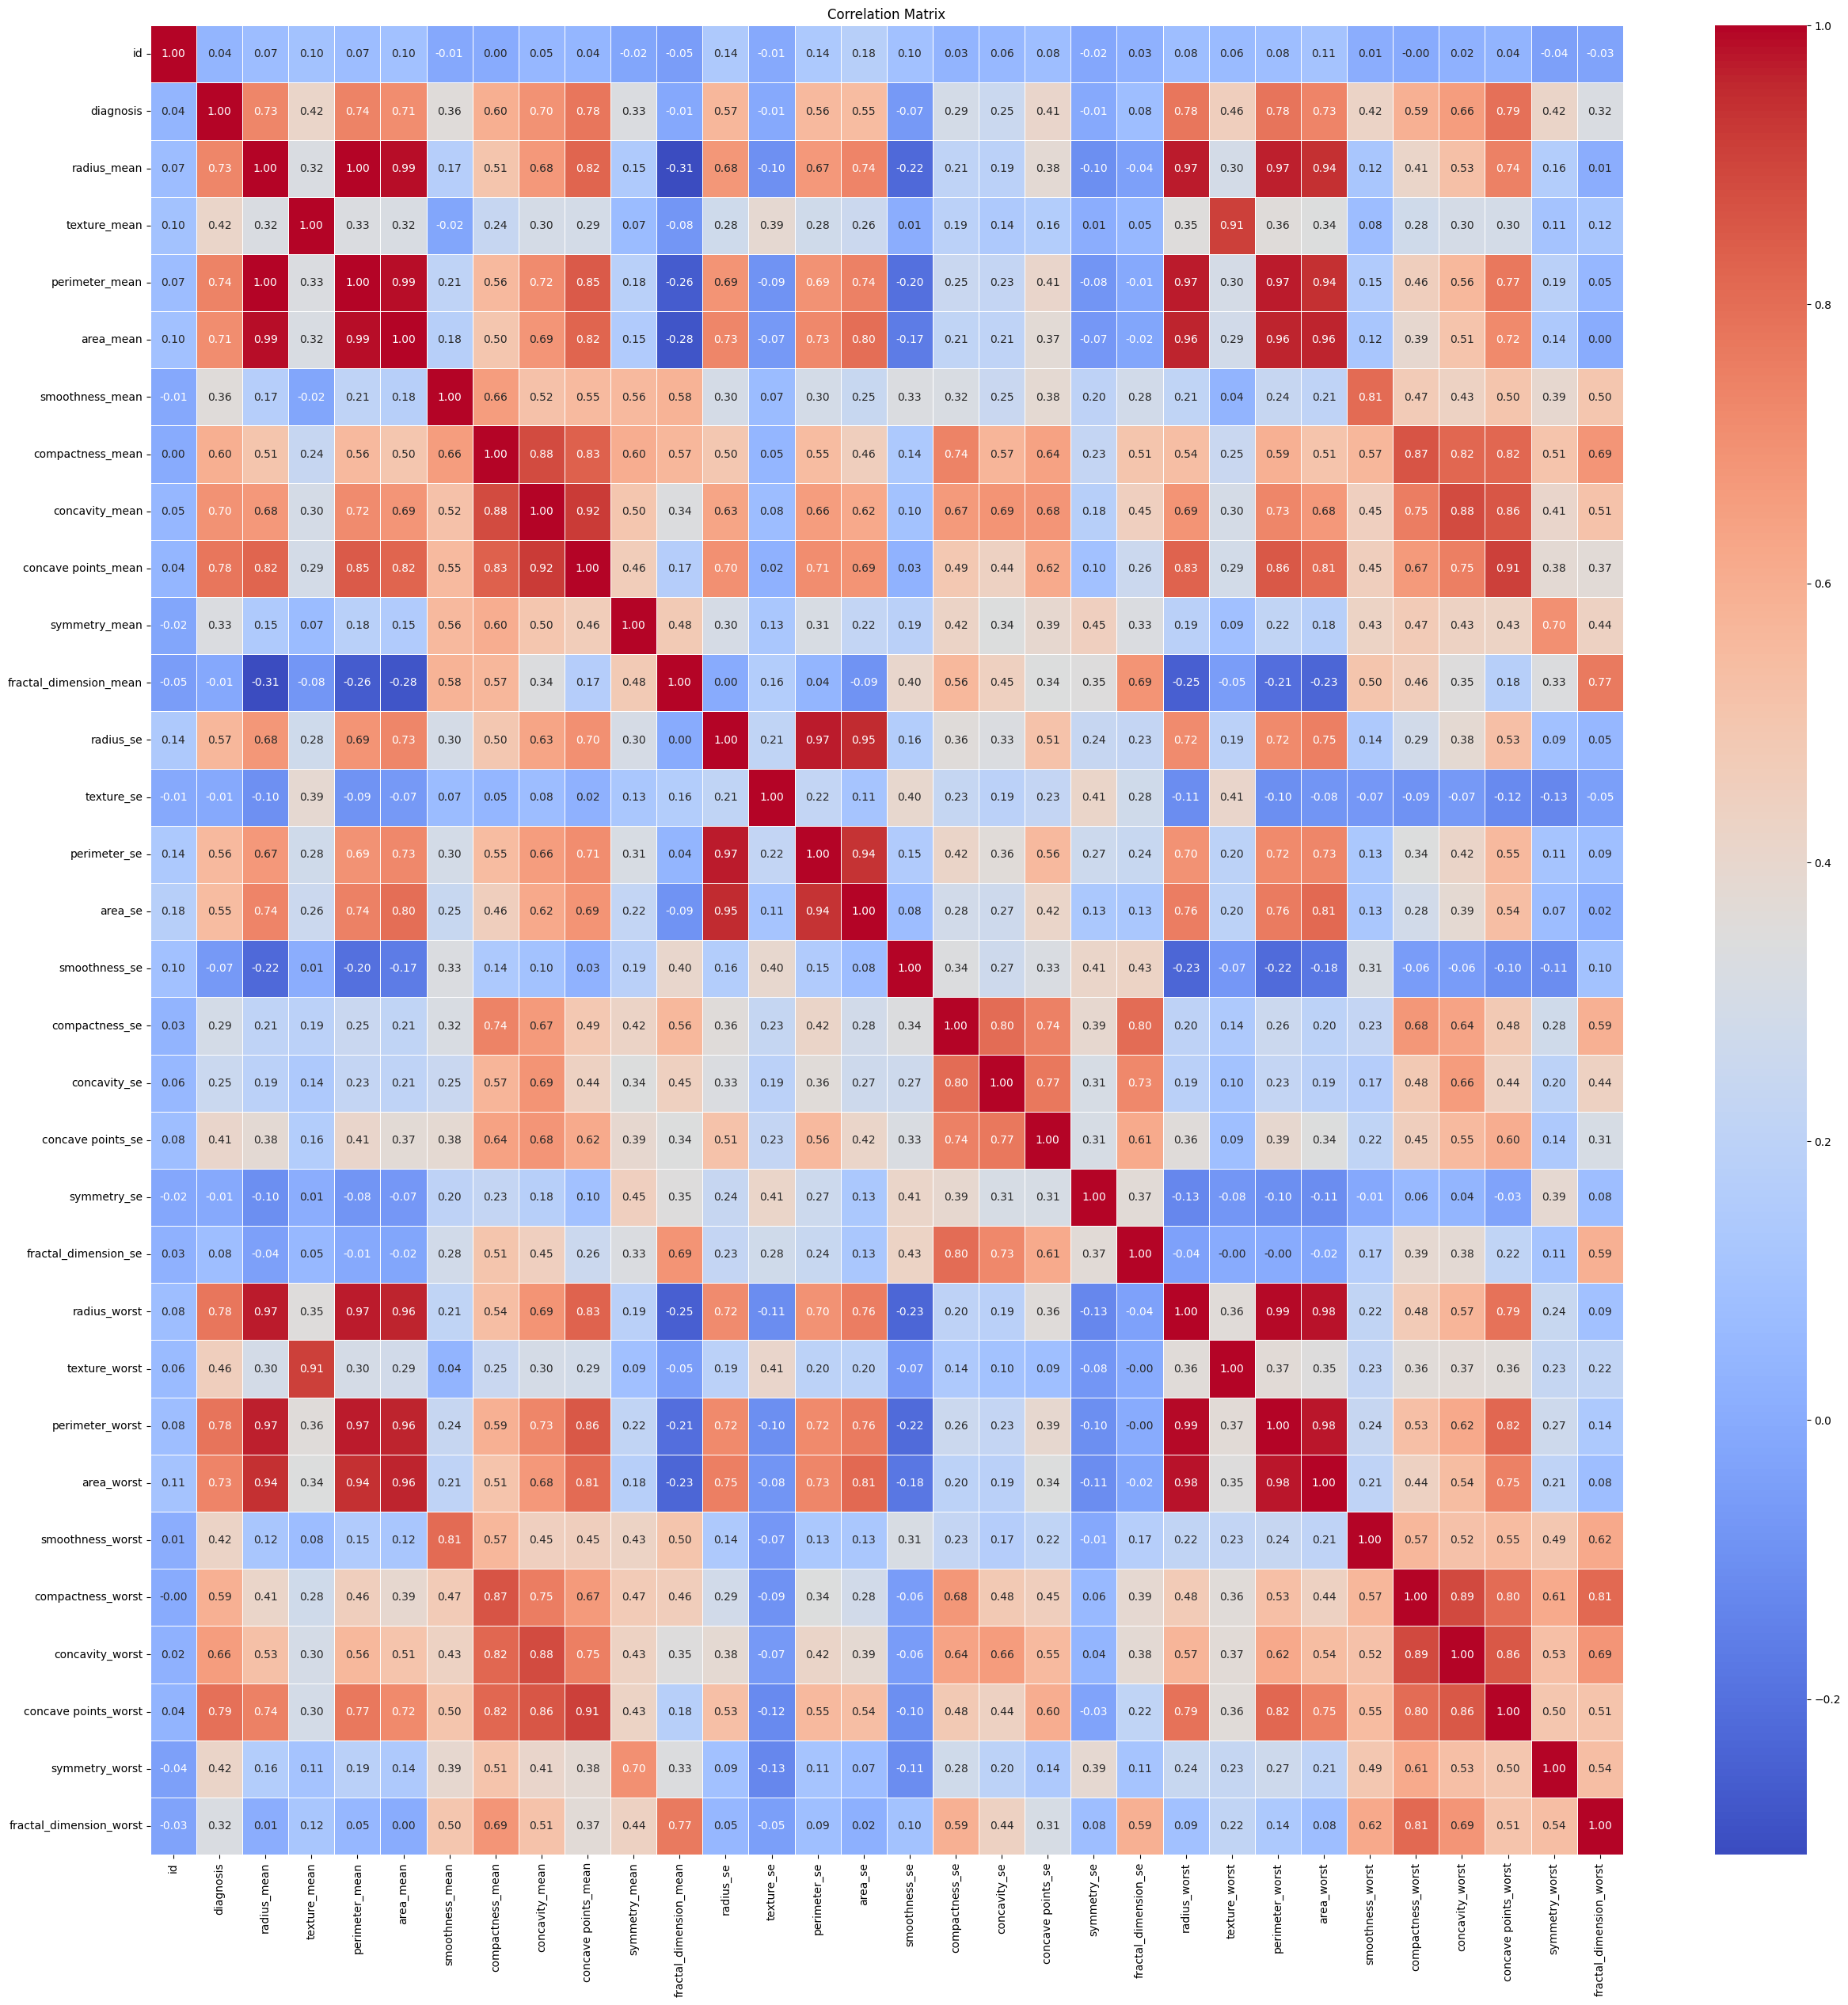

In [11]:
corr = df.corr()

plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Let us generate the diagonal correlation matrix to enable an easier way to view the correlations.

<Axes: >

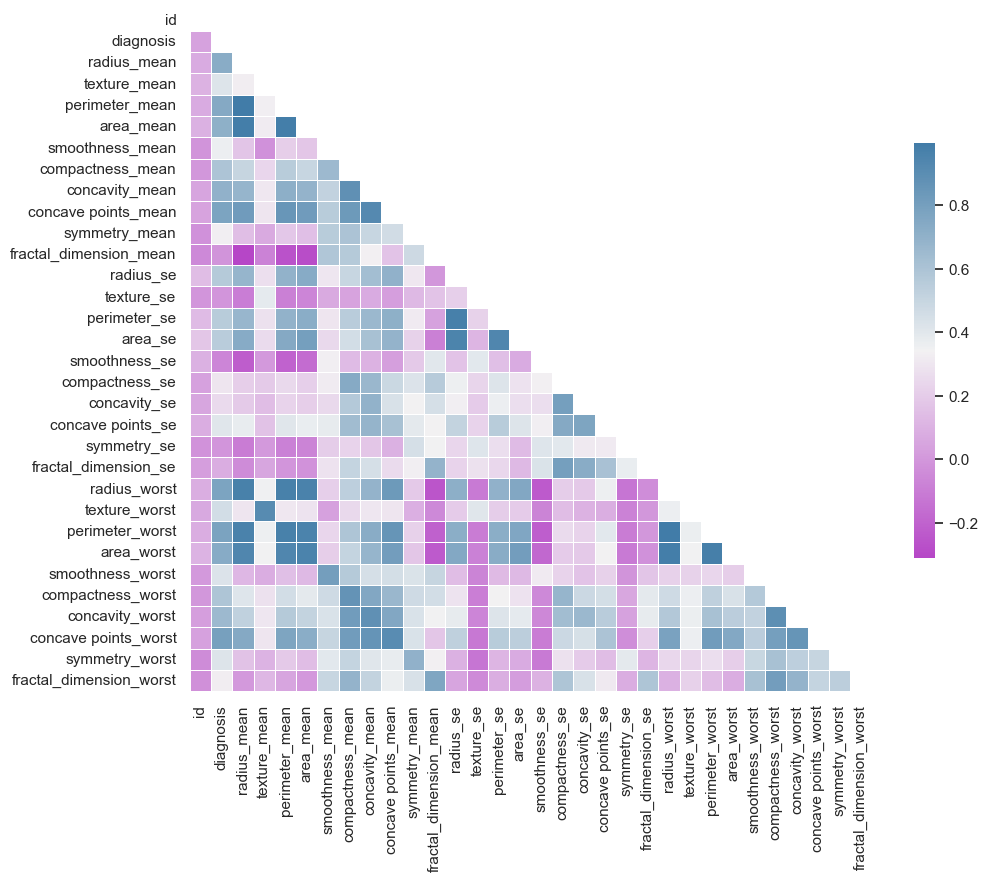

In [12]:
sns.set_theme(style="white")
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(300, 600, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .6})

Let us draw pair plots for the features.

In [13]:
# sns.pairplot(df, hue='diagnosis', diag_kind='kde')
# plt.show

Let us group the mean features and draw pair plots.

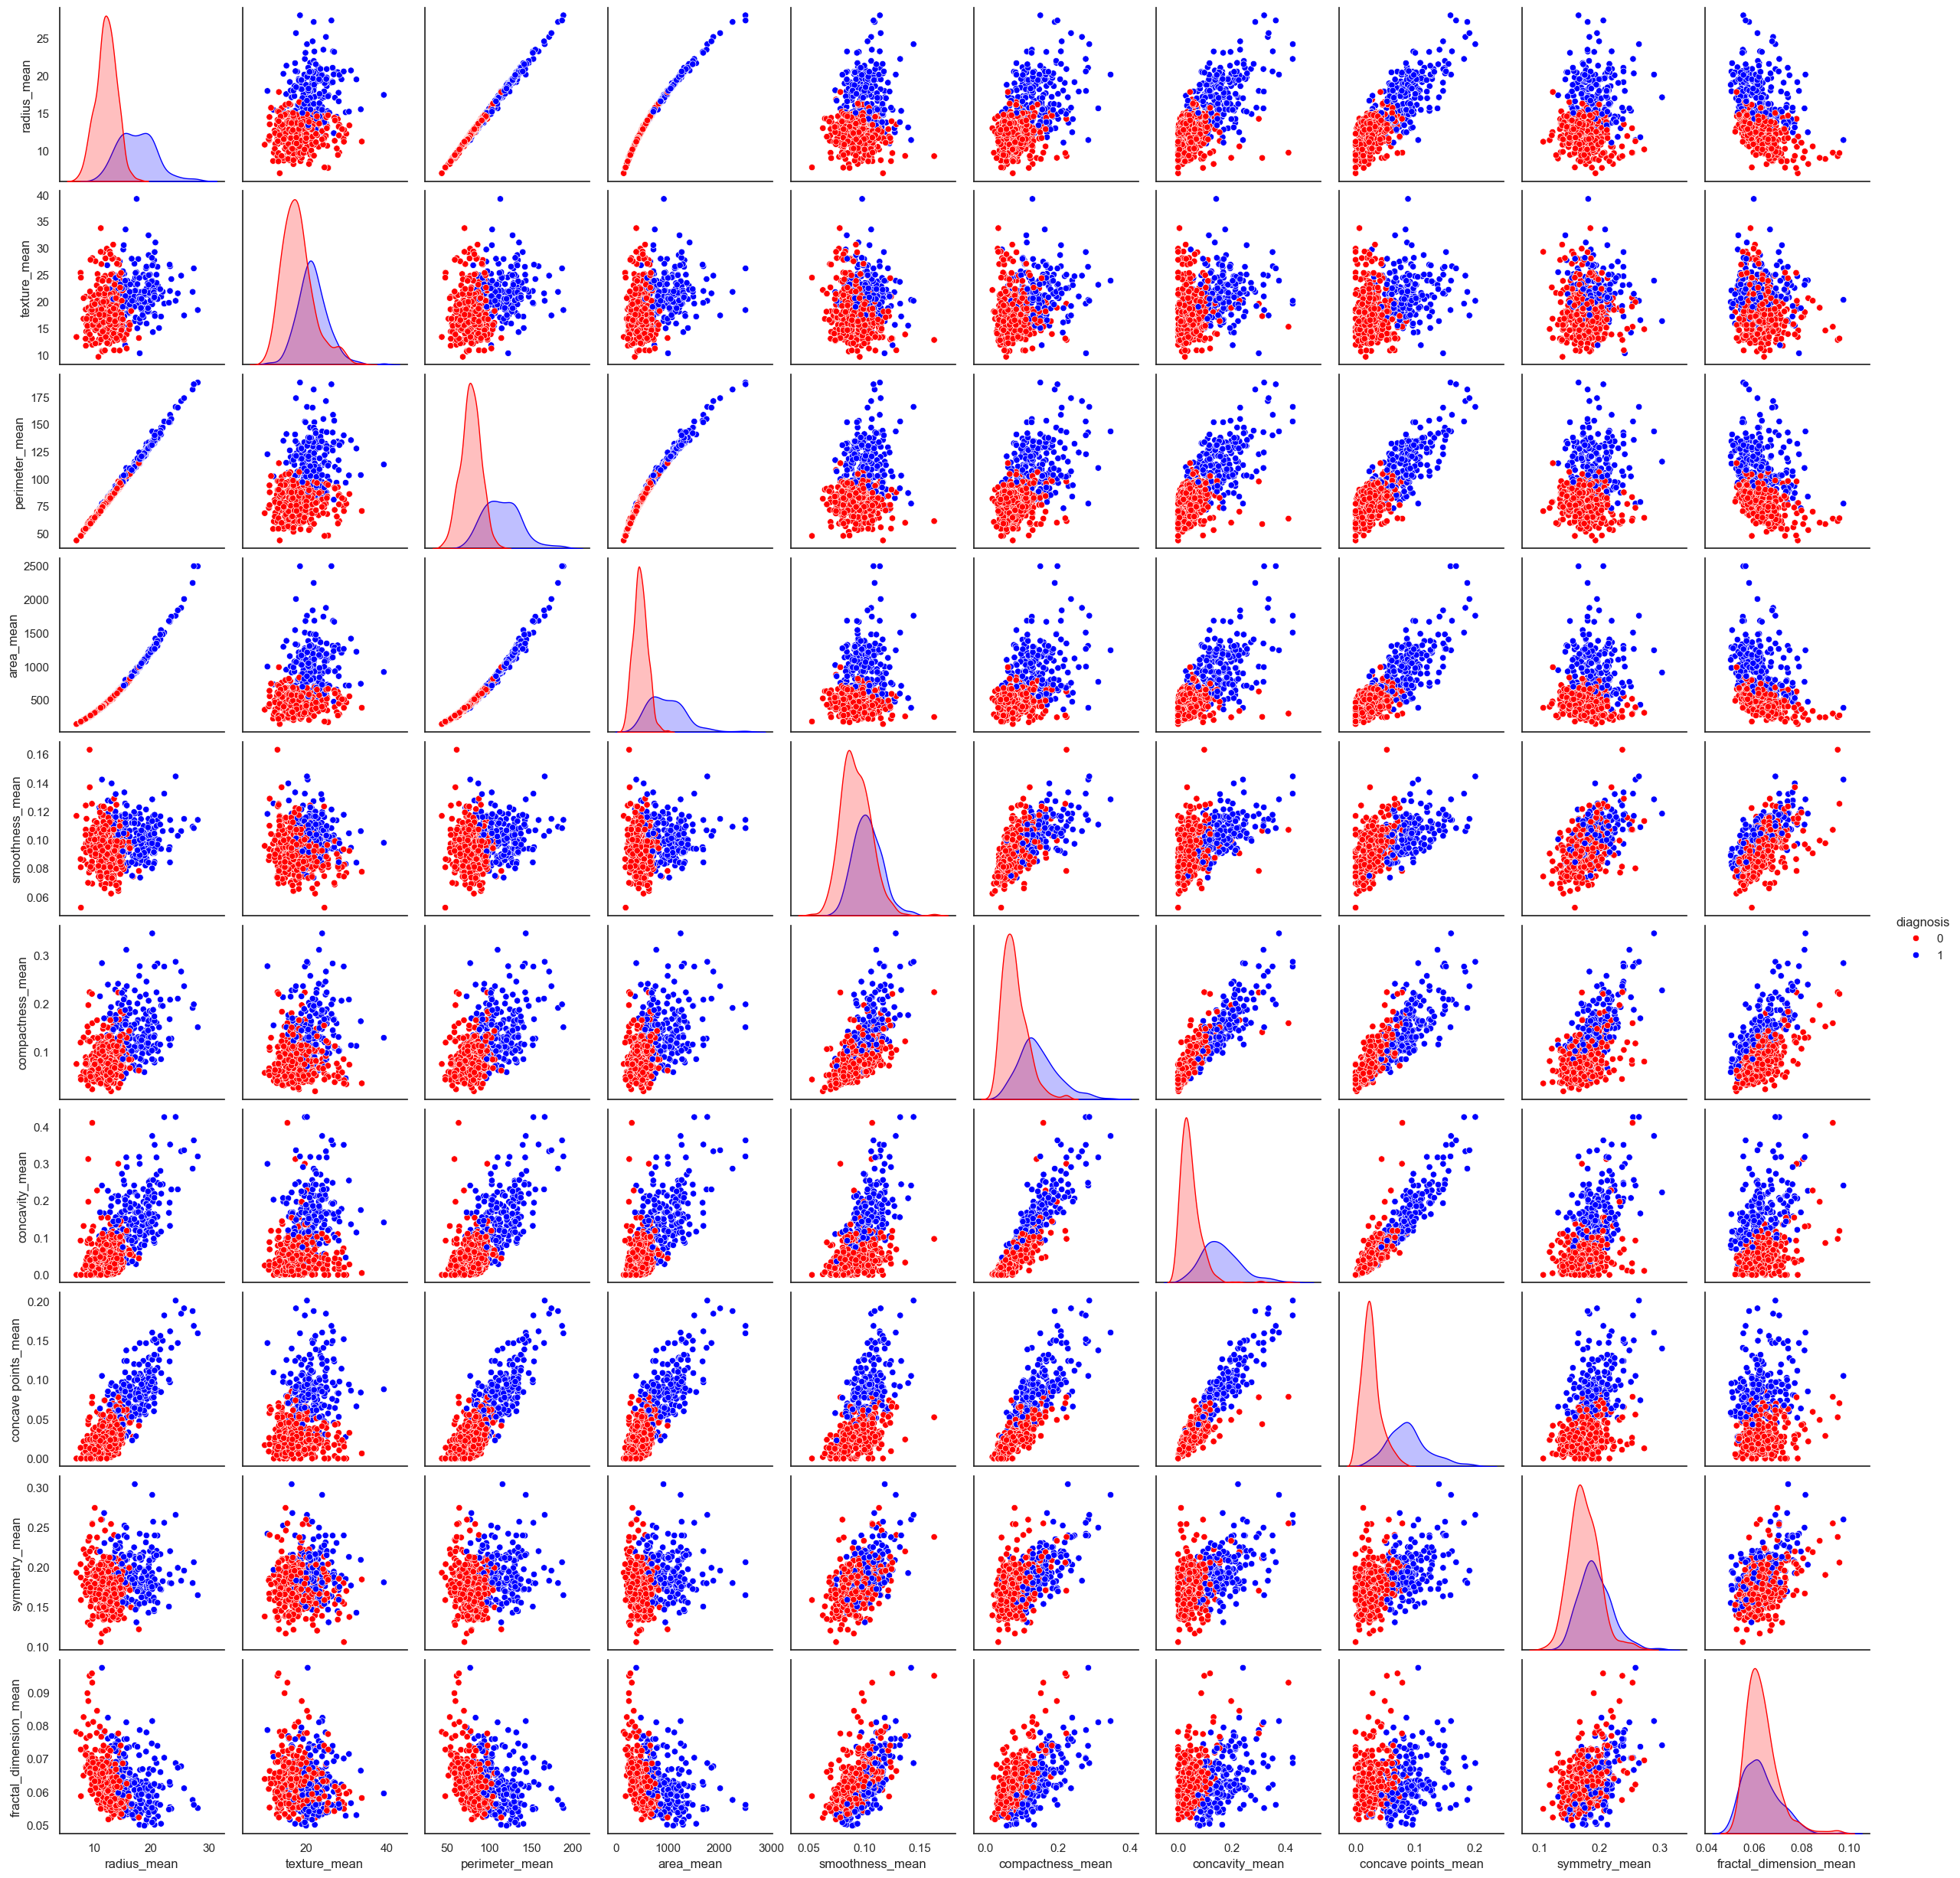

In [14]:
column_means = ('diagnosis', 'radius_mean','texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean',
                 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean')

df_mean = pd.DataFrame(df, columns=column_means)
sns.pairplot(df_mean, hue='diagnosis', diag_kind='kde', palette=['red','blue'])

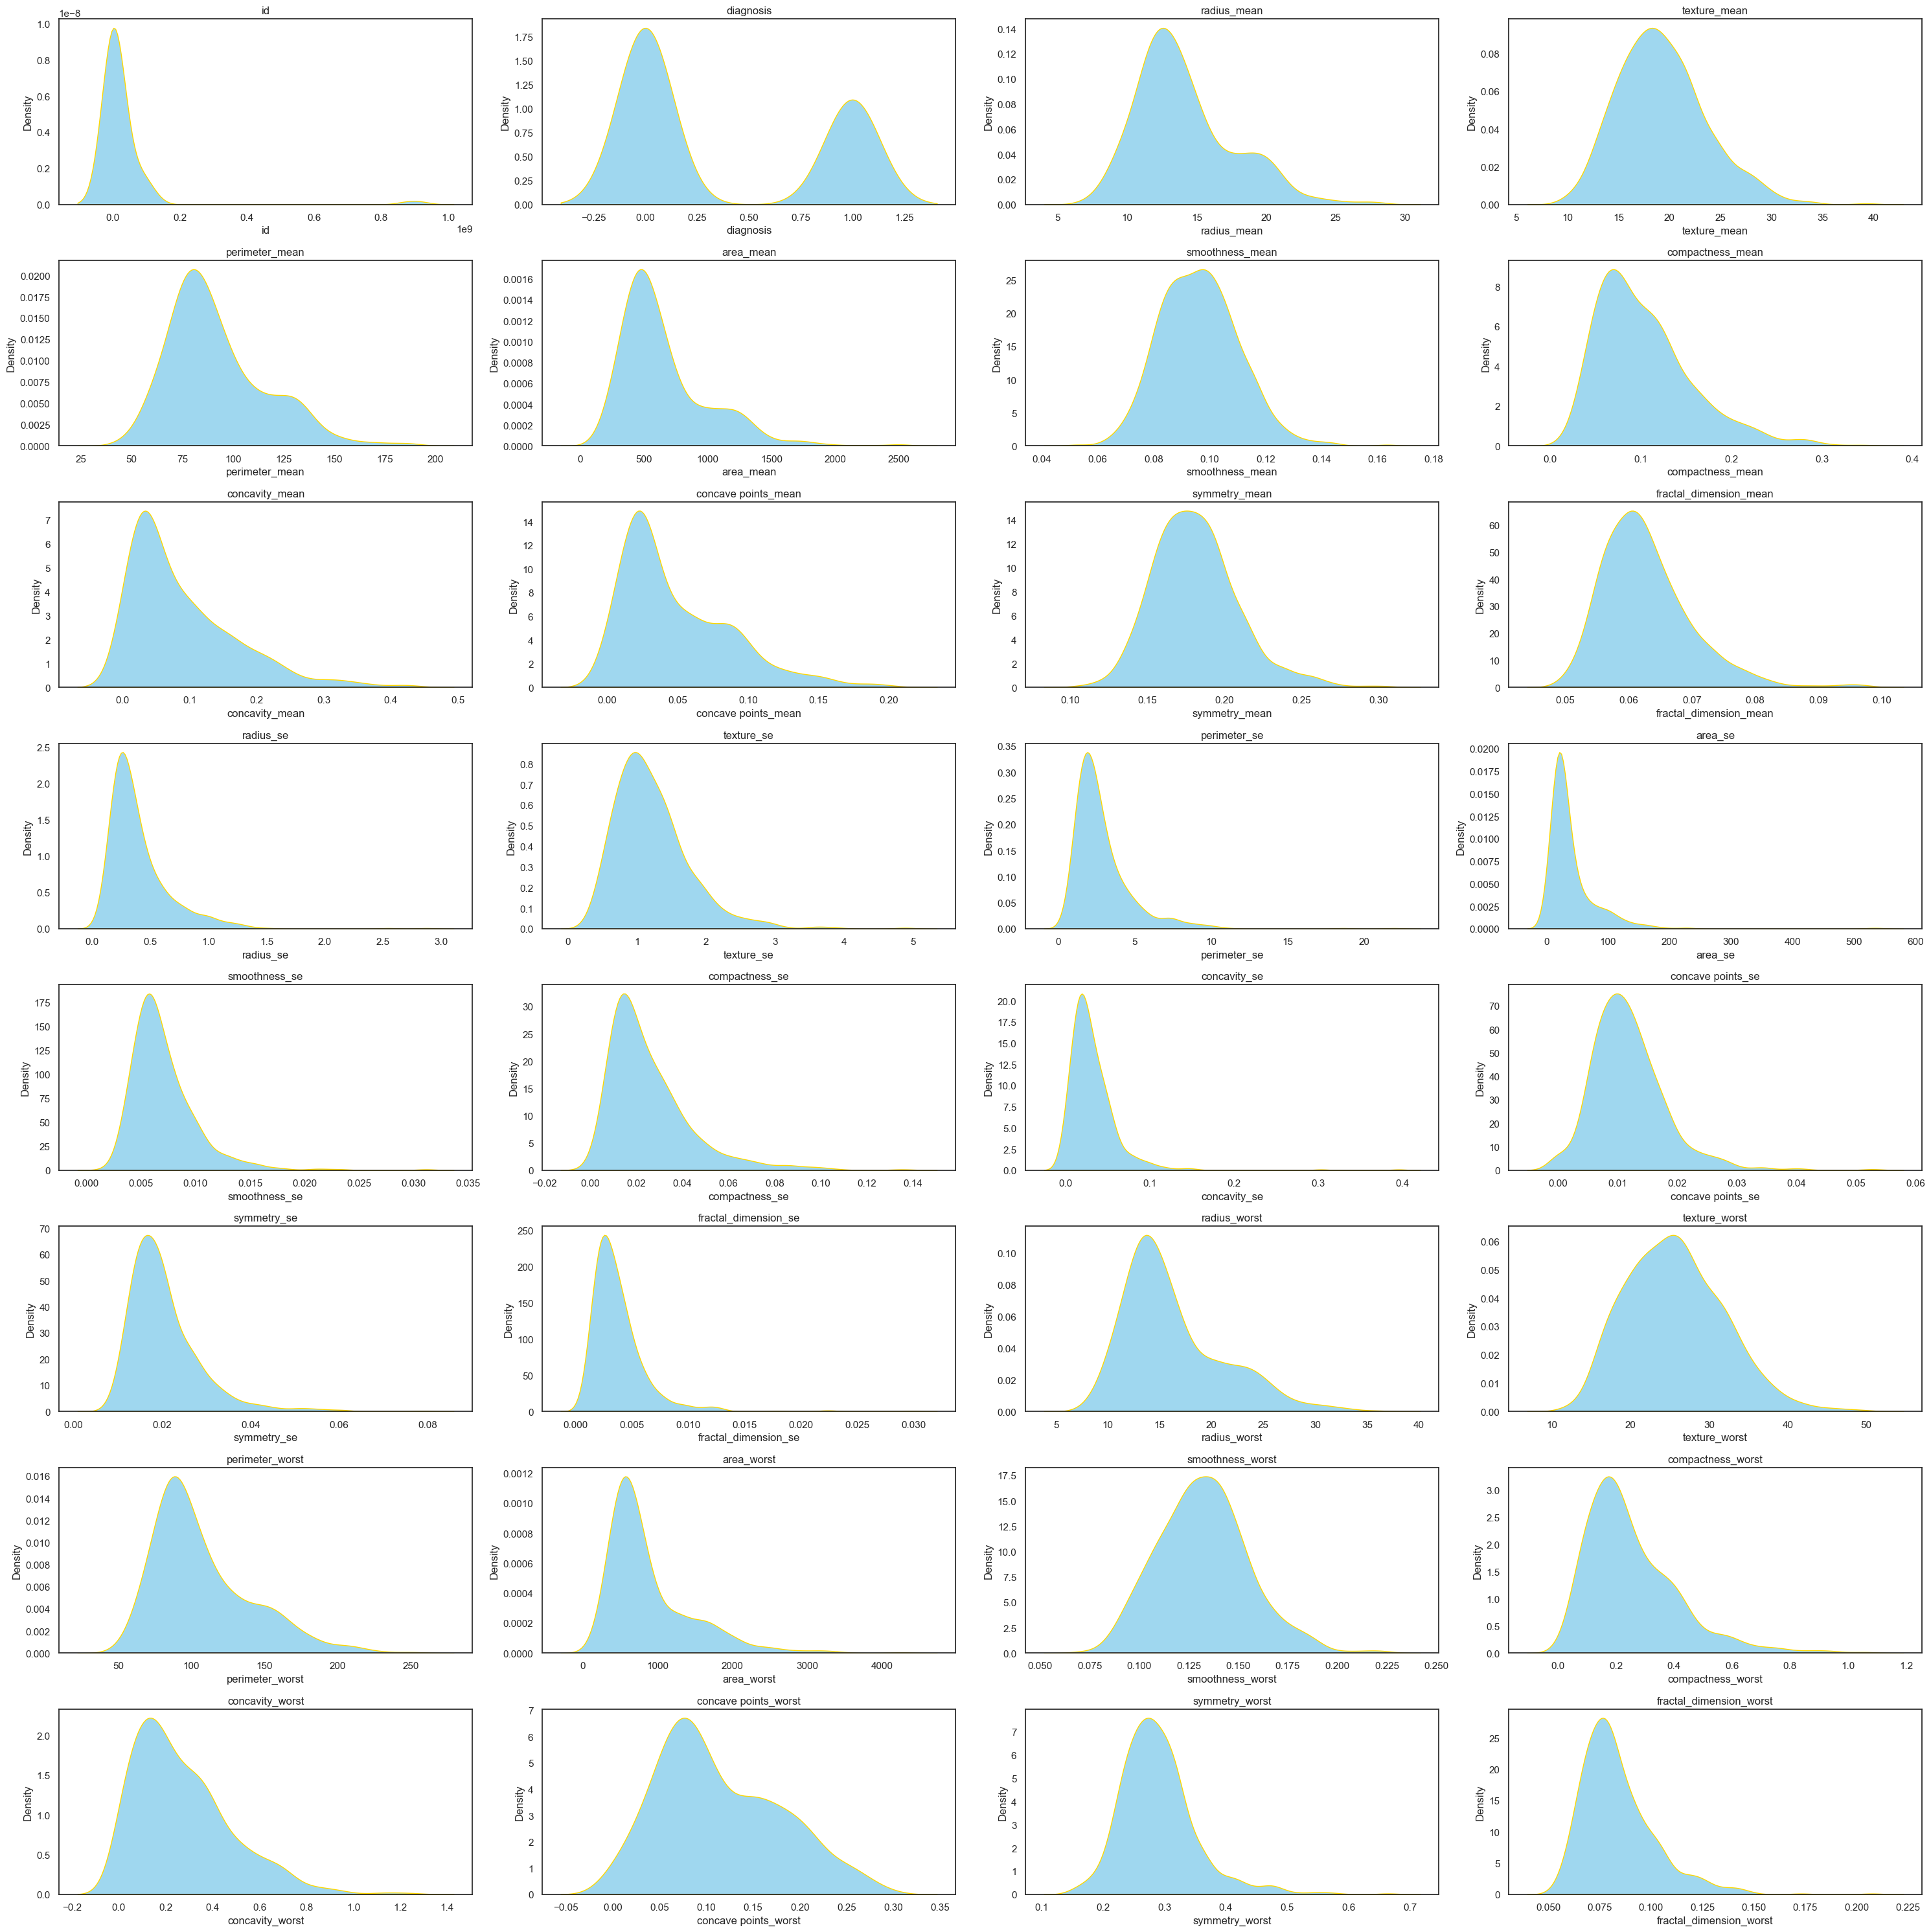

In [15]:
plt.figure(figsize=(30,30))
for i, feature in enumerate(df.columns):
    plt.subplot(8,4,i+1)
    sns.kdeplot(df[feature], shade=True, color='skyblue', edgecolor='gold', alpha=0.8)
    plt.title(feature)
plt.tight_layout()
plt.show()

<Axes: xlabel='variable', ylabel='value'>

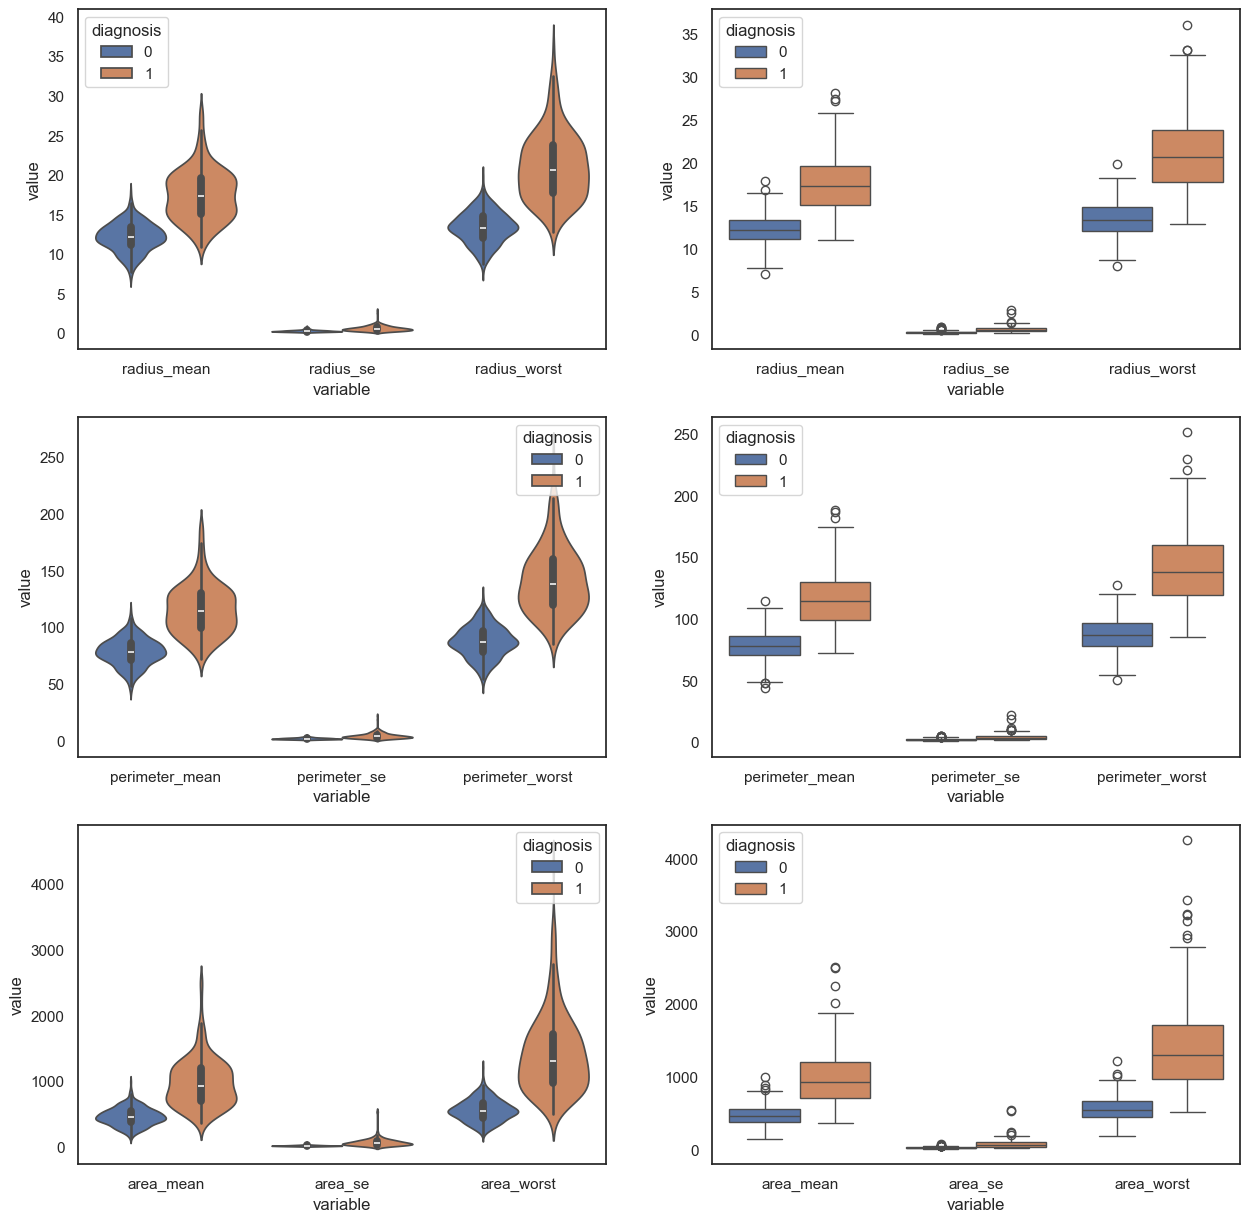

In [25]:
column_set_1 = ['diagnosis' , 'radius_mean', 'radius_se', 'radius_worst']
df_set_1 = pd.DataFrame(df, columns=column_set_1)

column_set_2 = ['diagnosis' , 'perimeter_mean', 'perimeter_se', 'perimeter_worst']
df_set_2 = pd.DataFrame(df, columns=column_set_2)

column_set_3 = ['diagnosis' , 'area_mean', 'area_se', 'area_worst']
df_set_3 = pd.DataFrame(df, columns=column_set_3)

fig, axes = plt.subplots(3,2, figsize=(15,15))
# radius
sns.violinplot(x= "variable" ,y = "value", hue= "diagnosis", data=pd.melt(df_set_1, id_vars='diagnosis'), scale="width", ax = axes[0,0])
sns.boxplot(x= "variable" ,y = "value", hue= "diagnosis", data=pd.melt(df_set_1, id_vars='diagnosis'), ax = axes[0,1])
# perimeter
sns.violinplot(x= "variable" ,y = "value", hue= "diagnosis", data=pd.melt(df_set_2, id_vars='diagnosis'), scale="width", ax = axes[1,0])
sns.boxplot(x= "variable" ,y = "value", hue= "diagnosis", data=pd.melt(df_set_2, id_vars='diagnosis'), ax = axes[1,1])
# area
sns.violinplot(x= "variable" ,y = "value", hue= "diagnosis", data=pd.melt(df_set_3, id_vars='diagnosis'), scale="width", ax = axes[2,0])
sns.boxplot(x= "variable" ,y = "value", hue= "diagnosis", data=pd.melt(df_set_3, id_vars='diagnosis'), ax = axes[2,1])

In [26]:
# def get_box_plot(x):
#     f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
#     sns.boxplot(x, ax=ax_box)
#     sns.displot(x, kde= True)
#     ax_box.set(yticks=[])
#     sns.despine(ax=ax_hist)
#     sns.despine(ax=ax_box, left=True)
#     plt.show()

# # box plots and density plots for the features
# get_box_plot(df['radius_mean'])
# get_box_plot(df['area_mean'])
# get_box_plot(df['perimeter_mean'])
# get_box_plot(df['texture_mean'])
# get_box_plot(df['smoothness_mean'])
# get_box_plot(df['compactness_mean'])
# get_box_plot(df['concavity_mean'])
# get_box_plot(df['concave points_mean'])
# get_box_plot(df['symmetry_mean'])
# get_box_plot(df['fractal_dimension_mean'])

### Principal Component Analysis

Projecting the data onto a 2D frame
Explained variance ratio: [0.44272026 0.18971182]


Text(0.5, 1.0, 'PCA of the Dataset')

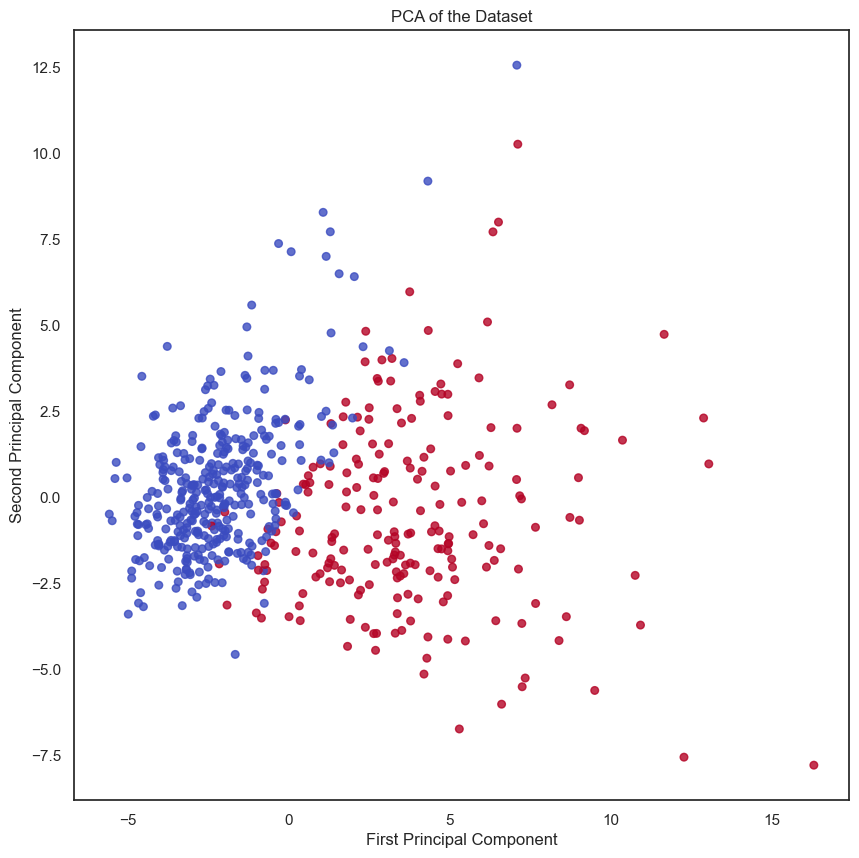

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = df.drop(columns=['id', 'diagnosis'], axis=1)
y = df['diagnosis']

x_scaled = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
x_pca_scaled = pca.fit_transform(x_scaled)

print("Projecting the data onto a 2D frame")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

plt.figure(figsize=(10,10))
plt.scatter(x_pca_scaled[:,0], x_pca_scaled[:,1], c=y, cmap='coolwarm', alpha=0.8, s=30)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of the Dataset')

### tSNE Analysis

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.311s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.414330
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.950962
[t-SNE] KL divergence after 500 iterations: 0.939316
Projecting the tSNE Analysis onto a 2D frame


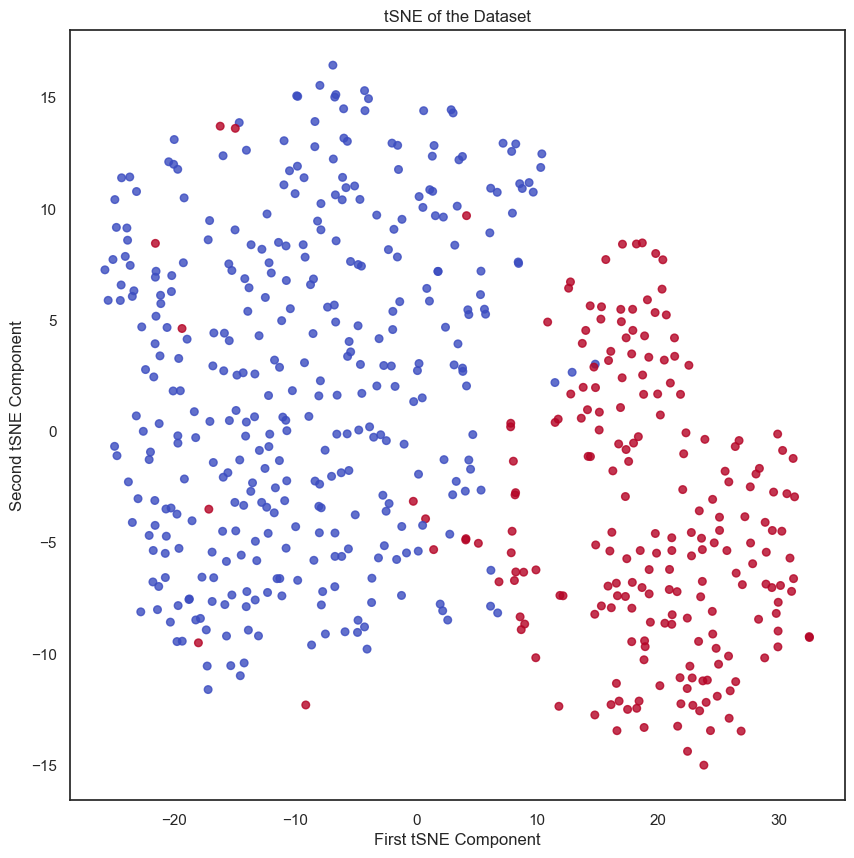

In [28]:
from sklearn.manifold import TSNE

tSNE = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=500)
tSNE_results = tSNE.fit_transform(x_scaled)

print("Projecting the tSNE Analysis onto a 2D frame")
plt.figure(figsize=(10,10))
plt.scatter(tSNE_results[:,0], tSNE_results[:,1], c=y, cmap='coolwarm', alpha=0.8, s=30)
plt.xlabel('First tSNE Component')
plt.ylabel('Second tSNE Component')
plt.title('tSNE of the Dataset')
plt.show()